In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import keras
import cv2
from imageio import imread
from PIL import Image
from keras import layers
from keras import models
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50
import os

D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [26]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/a9/51/aa1d756644bf4624c03844115e4ac4058eff77acd786b26315f051a4b195/tb_nightly-1.14.0a20190301-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/13/82/f16063b4eed210dc2ab057930ac1da4fbe1e91b7b051a6c8370b401e6ae7/tf_estimator_nightly-1.14.0.dev2019030115-py2.py3-none-any.whl
  Found existing installation: tb-nightly 1.15.0a20190819
    Uninstalling tb-nightly-1.15.0a20190819:
      Successfully uninstalled tb-nightly-1.15.0a20190819
  Found existing installation: tf-estimator-nightly 1.14.0.dev2019060501
    Uninstalling tf-estimator-nightly-1.14.0.dev2019060501:
      Successfully uninstalled tf-estimator-nightly-1.14.0.dev2019060501
Note: you may need to restart the kernel to use updated packages.


ERROR: tf-nightly 1.15.0.dev20190818 has requirement tb-nightly<1.16.0a0,>=1.15.0a0, but you'll have tb-nightly 1.14.0a20190301 which is incompatible.
ERROR: tensorflow-gpu 2.0.0b1 has requirement tb-nightly<1.14.0a20190604,>=1.14.0a20190603, but you'll have tb-nightly 1.14.0a20190301 which is incompatible.
ERROR: tensorflow-gpu 2.0.0b1 has requirement tf-estimator-nightly<1.14.0.dev2019060502,>=1.14.0.dev2019060501, but you'll have tf-estimator-nightly 1.14.0.dev2019030115 which is incompatible.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
pip install --upgrade --user

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
print(os.listdir('/Yeni/DTS/pelatihan/coba/final/fruits'))

['test', 'train']


In [3]:
img_dir_test = "/Yeni/DTS/pelatihan/coba/final/fruits/test"

In [4]:
img_dir_test

'/Yeni/DTS/pelatihan/coba/final/fruits/test'

In [5]:
fruits_list=os.listdir(img_dir_test)
fruits_list

['Apple Braeburn',
 'Banana',
 'Cactus fruit',
 'Ginger Root',
 'Hazelnut',
 'Kiwi',
 'Strawberry']

In [6]:
img_dir_train = "/Yeni/DTS/pelatihan/coba/final/fruits/train"
img_dir_train

'/Yeni/DTS/pelatihan/coba/final/fruits/train'

In [7]:
fruits_list=os.listdir(img_dir_train)
fruits_list

['Apple Braeburn',
 'Banana',
 'Cactus fruit',
 'Ginger Root',
 'Hazelnut',
 'Kiwi',
 'Strawberry']

In [8]:
Apple_dir ='/Yeni/DTS/pelatihan/coba/final/fruits/test/Apple Braeburn'
Banana_dir = '/Yeni/DTS/pelatihan/coba/final/fruits/test/Banana'
Cactus_dir = '/Yeni/DTS/pelatihan/coba/final/fruits/test/Cactus fruit'
Ginger_dir = '/Yeni/DTS/pelatihan/coba/final/fruits/test/Ginger Root'
Hazelnut_dir = '/Yeni/DTS/pelatihan/coba/final/fruits/test/Hazelnut'
Kiwi_dir = '/Yeni/DTS/pelatihan/coba/final/fruits/test/Kiwi'
Strawberry_dir = '/Yeni/DTS/pelatihan/coba/final/fruits/test/Strawberry'

In [9]:
data = []
labels = []

for u in os.listdir(Apple_dir):
    try:
        
        image = imread("/Yeni/DTS/pelatihan/coba/final/fruits/test/Apple Braeburn"+"/"+u)
        image_array = Image.fromarray(image, 'RGB')
        resize_img = image_array.resize((100 , 100))
        data.append(np.array(resize_img))
        labels.append(0)
        
    except AttributeError:
        print('')
        
for v in os.listdir(Banana_dir):
    try:
        
        image = imread("/Yeni/DTS/pelatihan/coba/final/fruits/test/Banana"+"/"+v)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((100 , 100))
        data.append(np.array(resize_img))
        labels.append(1)
        
    except AttributeError:
        print('')

for j in os.listdir(Cactus_dir):
    try:
        
        image = imread("/Yeni/DTS/pelatihan/coba/final/fruits/test/Cactus fruit"+"/"+j)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((100 , 100))
        data.append(np.array(resize_img))
        labels.append(2)
        
    except AttributeError:
        print('')

for k in os.listdir(Ginger_dir):
    try:
        
        image = imread("/Yeni/DTS/pelatihan/coba/final/fruits/test/Ginger Root"+"/"+k)
        image_array = Image.fromarray(np.array(image) , 'RGB')
        resize_img = image_array.resize((100 , 100))
        data.append(np.array(resize_img))
        labels.append(3)
        
    except AttributeError:
        print('') 

for l in os.listdir(Hazelnut_dir)[:800]:
    if l.endswith('.jpg'):
        try:
        
            image = imread("/Yeni/DTS/pelatihan/coba/final/fruits/test/Hazelnut"+"/"+l)
            image_array = Image.fromarray(image , 'RGB')
            resize_img = image_array.resize((100 , 100))
            data.append(np.array(resize_img))
            labels.append(4)
        
        except AttributeError:
            print('') 
            
for m in os.listdir(Kiwi_dir):
    try:
        
        image = imread("/Yeni/DTS/pelatihan/coba/final/fruits/test/Kiwi"+"/"+k)
        image_array = Image.fromarray(np.array(image) , 'RGB')
        resize_img = image_array.resize((100 , 100))
        data.append(np.array(resize_img))
        labels.append(5)
        
    except AttributeError:
        print('') 

for n in os.listdir(Strawberry_dir):
    try:
        
        image = imread("/Yeni/DTS/pelatihan/coba/final/fruits/test/Strawberry"+"/"+k)
        image_array = Image.fromarray(np.array(image) , 'RGB')
        resize_img = image_array.resize((100 , 100))
        data.append(np.array(resize_img))
        labels.append(6)
        
    except AttributeError:
        print('') 


In [10]:
fruits = np.array(data)
labels = np.array(labels)

In [11]:
np.shape(fruits)

(1072, 100, 100, 3)

In [12]:
print('fruits : {} | labels : {}'.format(fruits.shape , labels.shape))

fruits : (1072, 100, 100, 3) | labels : (1072,)


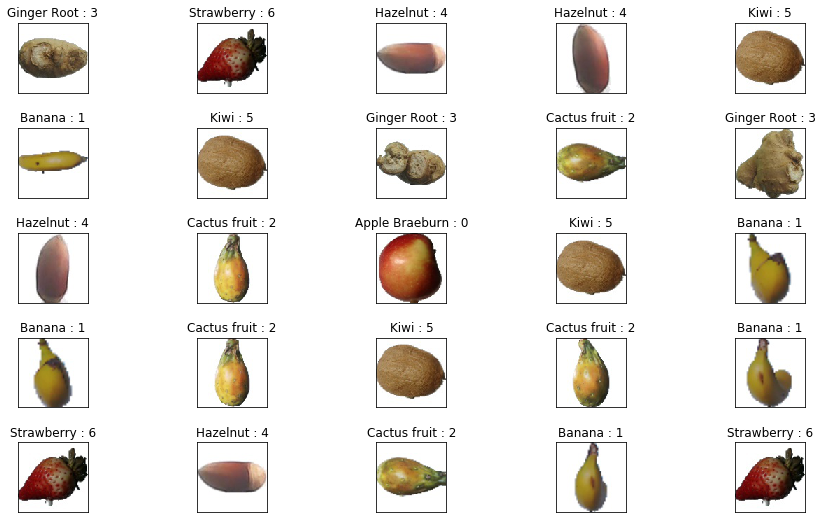

In [13]:
def fruits_type(x):
    if x==0:
        return 'Apple Braeburn'
    if x==1: 
        return 'Banana'
    if x==2:
        return 'Cactus fruit'
    if x==3:
        return 'Ginger Root'
    if x==4:
        return 'Hazelnut'
    if x==5:
        return 'Kiwi'
    else:
        return 'Strawberry'


plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(25):
    n += 1 
    r = np.random.randint(0 , fruits.shape[0] , 1)
    plt.subplot(5 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(fruits[r[0]])
    plt.title('{} : {}'.format(fruits_type(labels[r[0]]), labels[r[0]]))
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [14]:
fruits, labels=shuffle(fruits, labels, random_state=0)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(fruits, labels, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Modeling
## A common and highly effective approach to deep learning on small image datasets is to use a pretrained network. We will use ResNet50 architecture

In [16]:
#import inception with pre-trained weights. do not include fully #connected layers
inception_base = ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = inception_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
# add a fully-connected layer
x = Dense(256, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(7, activation='softmax')(x)
# create the full network so we can train on it
inception_transfer = Model(inputs=inception_base.input, outputs=predictions)

W0826 09:21:54.671481  6900 deprecation_wrapper.py:119] From C:\Users\surya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 09:21:54.702681  6900 deprecation_wrapper.py:119] From C:\Users\surya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 09:21:54.733880  6900 deprecation_wrapper.py:119] From C:\Users\surya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0826 09:21:54.843081  6900 deprecation_wrapper.py:119] From C:\Users\surya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get

In [17]:
#import inception with pre-trained weights. do not include fully #connected layers
inception_base_vanilla = ResNet50(weights=None, include_top=False)

# add a global spatial average pooling layer
x = inception_base_vanilla.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(256, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(7, activation='softmax')(x)
# create the full network so we can train on it
inception_transfer_vanilla = Model(inputs=inception_base_vanilla.input, outputs=predictions)

In [18]:
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

inception_transfer_vanilla.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

W0826 09:22:26.277136  6900 deprecation_wrapper.py:119] From C:\Users\surya\AppData\Roaming\Python\Python37\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [19]:
inception_transfer.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [20]:
batch_size= 9

num_classes=7
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(X_train)

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

validation_generator=test_datagen.flow(X_val, y_val, batch_size=batch_size)

history = inception_transfer.fit_generator(
      train_generator,    
      steps_per_epoch=len(X_train) / batch_size, 
      epochs=3,
      validation_data=validation_generator,
      validation_steps=50)

W0826 09:22:29.053941  6900 deprecation.py:323] From D:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/3
77/76 [==============================] - 348s 5s/step - loss: 1.2926 - acc: 0.5528 - val_loss: 0.1363 - val_acc: 1.0000
Epoch 2/3
77/76 [==============================] - 343s 4s/step - loss: 0.3929 - acc: 0.9136 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 3/3
77/76 [==============================] - 340s 4s/step - loss: 0.1373 - acc: 0.9684 - val_loss: 0.0012 - val_acc: 1.0000


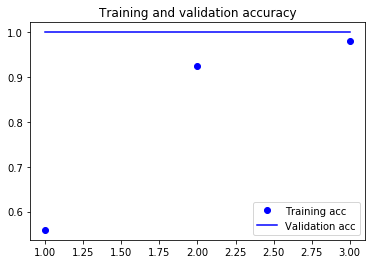

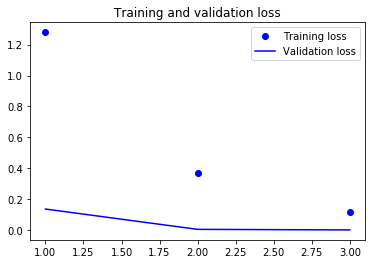

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
from PIL import Image
X_train=[]
X_test=[]
train=[]
test=[]
size=50
for root, dirs, files in os.walk("/Yeni/DTS/pelatihan/coba/final/fruits/train"):
    for name in dirs:
        for filename in os.listdir(os.path.join(root, name)):
            image=Image.open( os.path.join(root, name) + "/"+filename)
            img_resized = np.array(image.resize((size,size)))
            X_train.append(img_resized)
            train.append(name)
            
for root, dirs, files in os.walk("/Yeni/DTS/pelatihan/coba/final/fruits/test"):
    for name in dirs:
        for filename in os.listdir(os.path.join(root, name)):
            image=Image.open( os.path.join(root, name) + "/"+filename)
            img_resized = np.array(image.resize((size,size)))
            X_test.append(np.array(img_resized))
            test.append(name)
            
X_train=np.array(X_train)
X_test=np.array(X_test)


In [42]:
X_train,train=shuffle(X_train,train,random_state=0)
X_test,test=shuffle(X_test,test,random_state=0)

In [43]:
test=np.array(test)
train=np.array(train)
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
y_train=train.reshape(len(train), 1)
y_train = hot.fit_transform(y_train).toarray()
y_test=test.reshape(len(test), 1)
y_test = hot.transform(y_test).toarray()

In [44]:
X_train=X_train/255

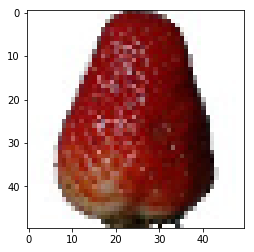

ValueError: Found array with dim 4. Estimator expected <= 2.

In [52]:
for k in range(10):
    i=np.random.randint(len(test))
    plt.imshow(X_test[i,:,:,:])
    plt.show()
    cc=inception_base.predict(X_test[i:i+1,:,:,:])
    cc=hot.inverse_transform(cc)
    print("prediction: ",cc)
    print("Reference       :",test[i])